In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [7]:
x_train[9487].shape

(28, 28, 1)

In [11]:
X = x_train[9487][:,:,0]

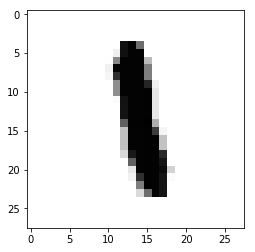

In [13]:
plt.imshow(X,cmap='Greys')

## 前置作業

In [14]:
from keras.utils import np_utils

In [15]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [39]:
y_train.shape

(60000, 10)

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD

In [17]:
model = Sequential()

In [19]:
model.add(Conv2D(32,(3,3),padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [21]:
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))

In [22]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [23]:
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))

In [24]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [25]:
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))

In [27]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [29]:
model.compile(loss='mse',optimizer=SGD(lr=0.05),metrics=['accuracy'])

## 訓練CNN

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [40]:
model.fit(x_train,y_train,batch_size=100,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 137s 2ms/step - loss: 0.1802 - acc: 0.0991
Epoch 2/10
60000/60000 [==============================] - 110s 2ms/step - loss: 0.1802 - acc: 0.0991
Epoch 3/10
60000/60000 [==============================] - 117s 2ms/step - loss: 0.1802 - acc: 0.0991
Epoch 4/10
60000/60000 [==============================] - 135s 2ms/step - loss: 0.1802 - acc: 0.0992
Epoch 5/10
60000/60000 [==============================] - 130s 2ms/step - loss: 0.1802 - acc: 0.0991
Epoch 6/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1802 - acc: 0.0991
Epoch 7/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1802 - acc: 0.0992 0s - loss: 0.1801 - acc: 0.0
Epoch 8/10
60000/60000 [==============================] - 123s 2ms/step - loss: 0.1802 - acc: 0.0991
Epoch 9/10
60000/60000 [==============================] - 131s 2ms/step - loss: 0.1802 - acc: 0.0991
Epoch 10/10
60000/60000 [==============================] - 117

In [41]:
score = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 6s 596us/step


In [34]:
print("loss",score[0])
print("acc",score[1])

loss 0.17982000937461853
acc 0.1009


In [33]:
model_json = model.to_json()
open('handwriting_model_cnn.json','w').write(model_json)
model.save_weights('handwriting_weights_cnn.h5')

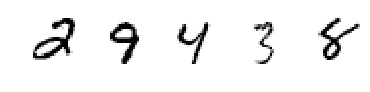

In [38]:
predict = model.predict_classes(x_test)

pick = np.random.randint(1,9999,5)
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28),cmap='Greys')
    plt.axis('off')